In [5]:
import matplotlib.pyplot as plt
import numpy as np
import aubio
from time import time

In [6]:
def yinFunc(b,c, a = 'avmA.wav', d = 44100, e = 1, f = "yin", g = .1 ):
    win_s = 1764 // e 
    hop_s = 441 // e 
    filename = a
    s = aubio.source(filename, d, hop_s)
    samplerate = s.samplerate
    pitch_o = aubio.pitch(f, win_s, hop_s, samplerate) 
    pitch_o.set_tolerance(g)
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        b += [pitch]
        c += [confidence]
        total_frames += read
        if read < hop_s:
             break
            

In [7]:
pitchesYINA = []
confidencesA = []
yinFunc(pitchesYINA, confidencesA, 'avmA.wav')

pitchesYINVe = []
confidencesVe = []
yinFunc(pitchesYINVe, confidencesVe, 'avmVe.wav')

pitchesYINMa = []
confidencesMa = []
yinFunc(pitchesYINMa, confidencesMa, 'avmMa.wav')

pitchesYINRi = []
confidencesRi = []
yinFunc(pitchesYINRi, confidencesRi, 'avmRi1.wav')

pitchesYINI = []
confidencesI = []
yinFunc(pitchesYINI, confidencesI, 'avmI.wav')

pitchesYINA2 = []
confidencesA2 = []
yinFunc(pitchesYINA2, confidencesA2, 'avmA2.wav')







In [8]:
def plotYin(a = pitchesYINA, b= 'A-', c = 1, d = 'Freq(Hz)', e = 'Frames',f= 400, g =600  ):
    plt.subplot(3,2,c)
    plt.plot(np.asarray(a), label='YIN', color='green')
    plt.legend(loc="upper right")
    plt.title(b)
    plt.ylabel(d)
    plt.xlabel(e)
    plt.ylim(f,g)
    

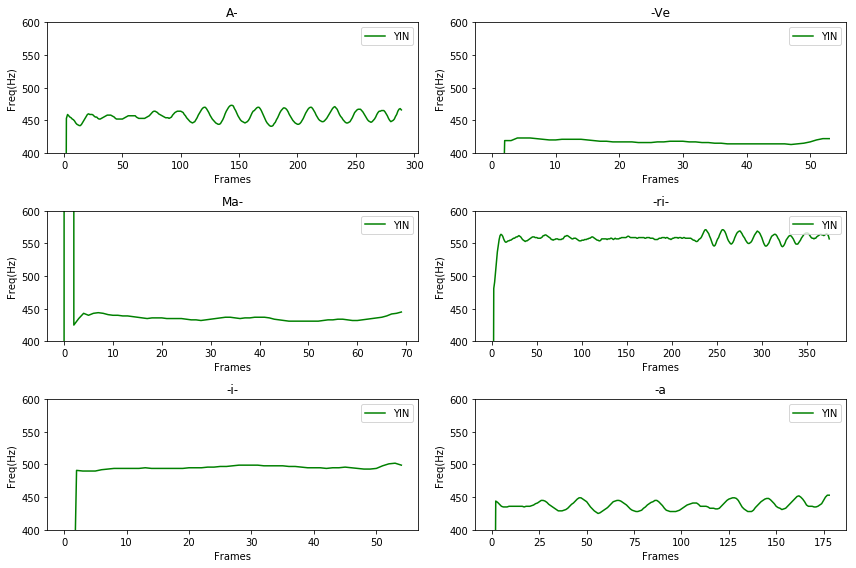

In [76]:
plt.figure(figsize=(12, 8))
plotYin(pitchesYINA, 'A-', 1)
plotYin(pitchesYINVe, '-Ve', 2)
plotYin(pitchesYINMa, 'Ma-', 3)
plotYin(pitchesYINRi, '-ri-', 4)
plotYin(pitchesYINI, '-i-', 5)
plotYin(pitchesYINA2, '-a', 6)
plt.tight_layout()